# Water management optimisation 
## Problem statement
Let's consider an ensemble of M municipalities that all have water demands. Each of the municipalities are linked to some of the R reservoirs in the area. The operational problem consists in finding how to allocate water at each time step so that the cost due to meeting water requirements is minimized.

The water demand of the municipality $i$ can be met from several sources: 
$$W_{it} = R_{it} + \sum_{r \in R_i}R_{irt} + GW_{it} + \sum_{j \in J_i}Q_{ijt} + Q_{ist}$$
where
- $R_{it}$ is a fraction of the local flow/run-off
- $R_{irt}$ are from the streams linked to the municipality i
- $Q_{ijt}$ denotes the import from reservoir $j$ to the municipality i
- $GW_{it}$ is the abstracted groundwater, and $Q_{ist}$ is the water imported from a super sink/source. This last term can be seen as a quantification of the failure to meet water demands with local resources, but also ensures a LP formulation of the optimisation problem.

To each of these sources, a volumetric cost is associated and we obtain the cost of the total water
$$cW_{it} = c_RR_{it} + c_{GW}GW_{it} + \sum_{j \in J_i}c_{ijt}Q_{ijt} + c_sQ_{ist}$$
where for instance rain harvest cost could be 0 ($c_R = 0$), groundwater cost stems from pumping ($c_{GW} \propto h_{it}E_{it}$), reservoirs cost depends on the municipality distance to the reservoir ($c_{ij}\propto d_{ij}$), and the cost of getting water from the super source $c_s$ is disproportionally large to discourage failure.

## Optimization
The optimization problem is thus simply
$$\min_{GW, Q} \sum_i cW_{it}$$
under the constraint that demands should be satisfied for each sector $W_{it}\geq \sum_k D_{kit}$, and several infrastructural and hydrological constraints listed hereafter.

### Climate uncertainty
Unknown climate future creates uncertainty in the performance of the system. We tackle this issue following a Monte Carlo approach by considering multiple climatic scenarios $cl \in CL$. We can take into account this uncertainty inside the operational problem by modifying the optimization problem in the following manner
$$\min_{GW, Q} \mathrm{E}\Big(\sum_i cW_{it_{cl}}\Big) = \sum_{cl}\sum_i \Big(cW_{it_{cl}}\cdot p(cl) \Big)$$
where $cl$ samples all potential climate scenarios and $p(cl)$ is the probability associated with the climate scenario $cl$. The minimization problem will find the optimal solution in terms of cost in surface and groundwater withdrawals under the uncertain climate. 

### Constraints
The optimisation problem is constrained on many aspects:
- The abstracted groundwater cannot exceed pumping capacity  $GW_{it} \leq pC_i$, nor available water in aquifer $GW_{it} \leq A_i(h_{it}-h_{wit})$, where $pC_i$ the pumping capacity in county $i$, $h_{it}$ the water table and $h_{wit}$ the well depth.
- $0 \leq \sum_{i\in J_i}Q_{ijt} \leq S_{jt} \leq SC_{jt}$ the total withdrawal from a reservoir $j$ cannot exceed the amount present in the reservoir at time $S_{jt}$, which in turn cannot exceed the maximum capacity of the reservoir $SC_{jt}$
- no constraint are placed on $Q_{ist}$ 


### Simulation
The system state variables are simulated as follows. Groundwater mass balance equation: $$h_{i,t+1}=h_{it} - \sum_{a\in A_i} s_{at}$$
Reservoir mass balance equation:
$$S_{j,t+1} = S_{jt} - \sum_{i\in I_j}Q_{ijt} + \sum_{r \in R_j}R_{rjt} - E_{it}$, with $0 \leq  S_{jt} \leq SC_{jt}$$

### Remarks
#### Notation
Reservoirs are denoted by the index $j$, counties by $i$ and streams (rivers) by $r$. Similarly, $j \in J_i$ denotes the reservoirs linked to county $i$, $i \in I_j$ the counties linked to the reservoir $j$, $r \in R_j$ the streams linked to reservoir $j$.\\
Costs are denoted by a small $c$ while capacities by a captial $C$.


#### Unit water cost
As stated above, to each source of water a unique cost is associated. The goal is not to represent accurately the absolute price of water, but that the relative prices between sources are correct so that the allocation is "realistic". Many options are possible here. 

##### Simplest model
In its simplest form, we do not take into account for which sector the water is allocated in terms of price (i.e. fixed treatment price wether the water is for domestic use or irrigation). 
- [$c_R$] local run-off. $c_R = 0$ at first
- [$c_{GW}$] the cost associated to groundwater extraction. We consider here that  
- [$c_{ijt}$] the cost of importing water from the reservoir $j$ to the county $i$. 
- [$c_{s}$] the cost of importing water from the super source. We consider that this cost is the same for all county. 

##### Depending on sectors
Depending on the source of water and its use, a different treatment cost is considered:  $$c_{SW}^{treat}(u)$ and $c_{GW}^{treat}(u)$$. The values will come from literature. 
- $c_R^u = c_R + c_{SW}^{treat}(u)$
- $c_{GW}^u = c_{GW} + c_{GW}^{treat}(u)$
- $c_{ijt}^u = c_{ijt} + c_{SW}^{treat}(u)$

## Illustration
A small example is proposed here. We assume that 5 municipalities are linked to 5 reservoirs and that each of the municipality also have the opportunity to get water from the aquifer. The code is centred in main.R, where the input files are called. It is also possible to decide at that point wether to use lpSolve or Gurobi as a solver.

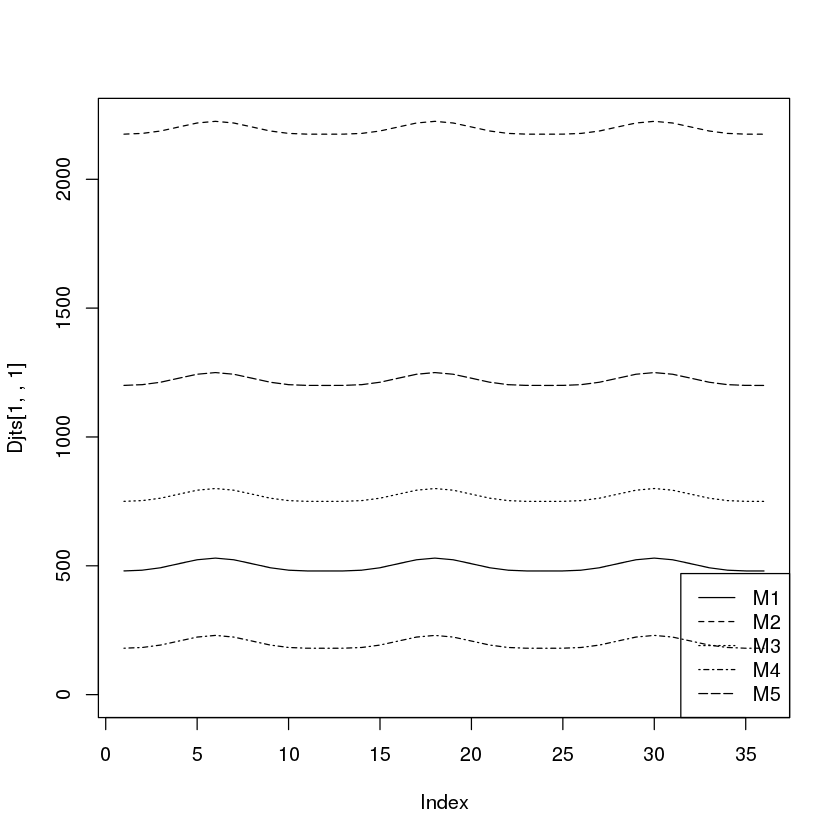

In [1]:
source("input_fivecounties.R")

In [2]:
source("generate_matrix_gw.R")

In [4]:
solver <- "lpsolve"
source("solving.R")

[1] "solving done by lpSolve"
[1] "Total cost of water allocation solution is : 643641.94$"


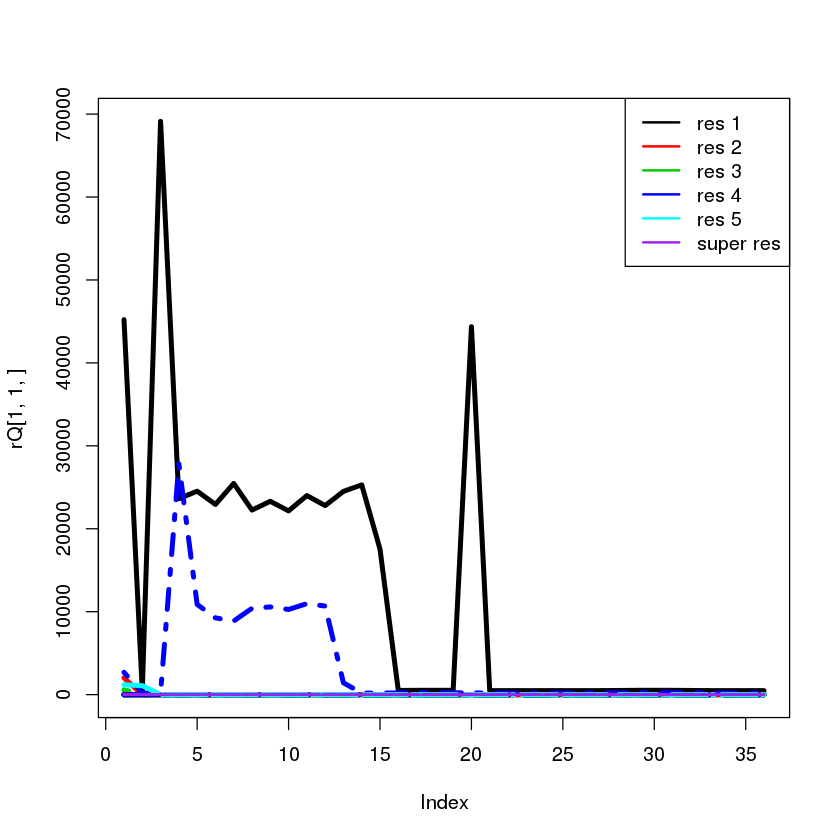

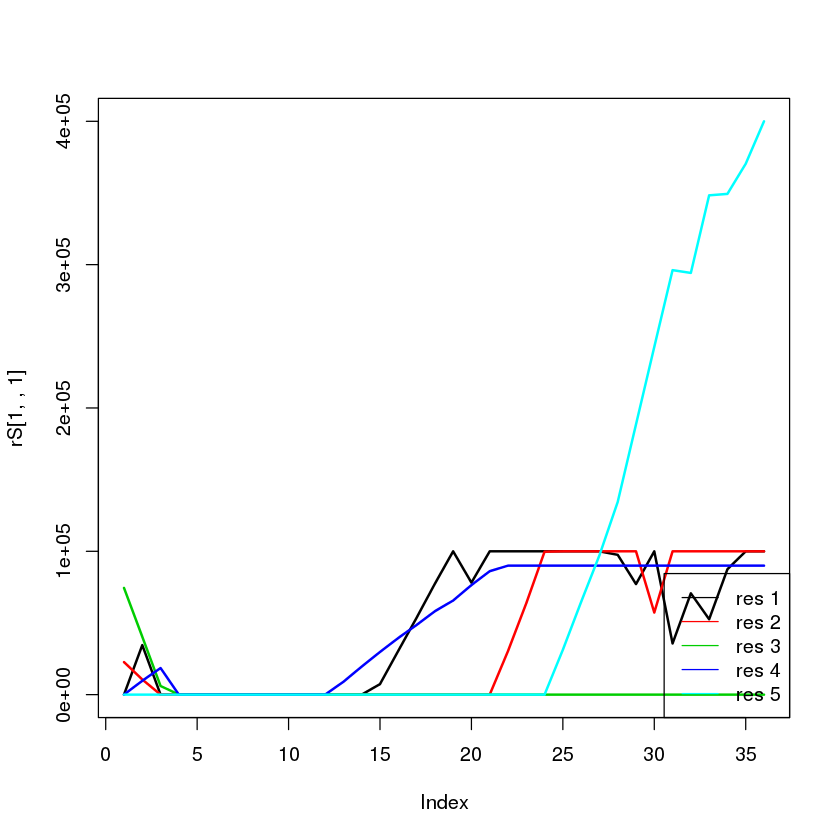

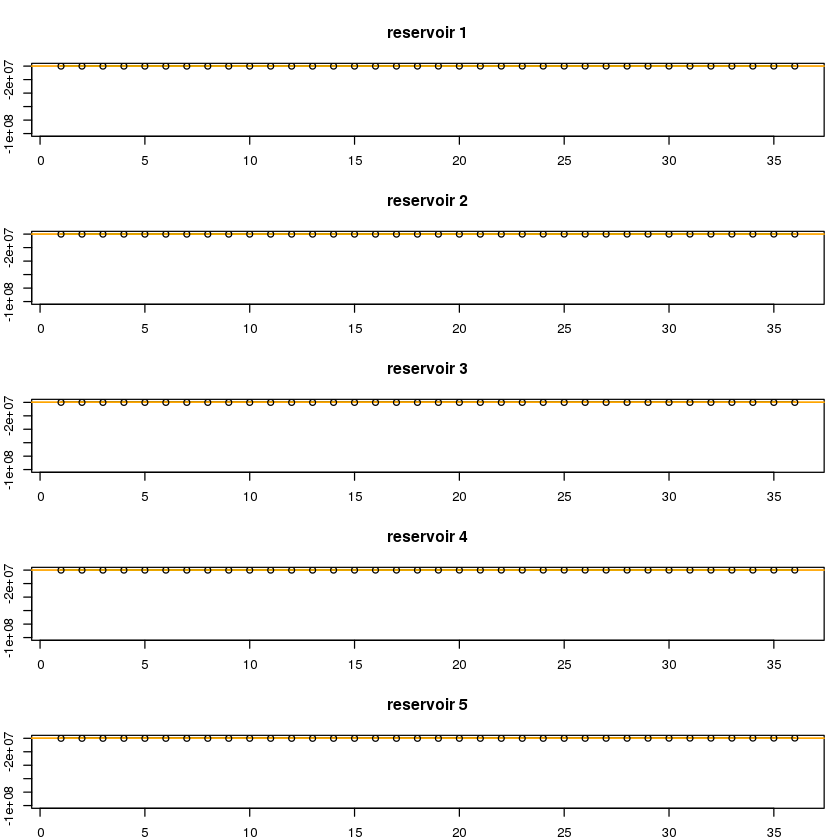

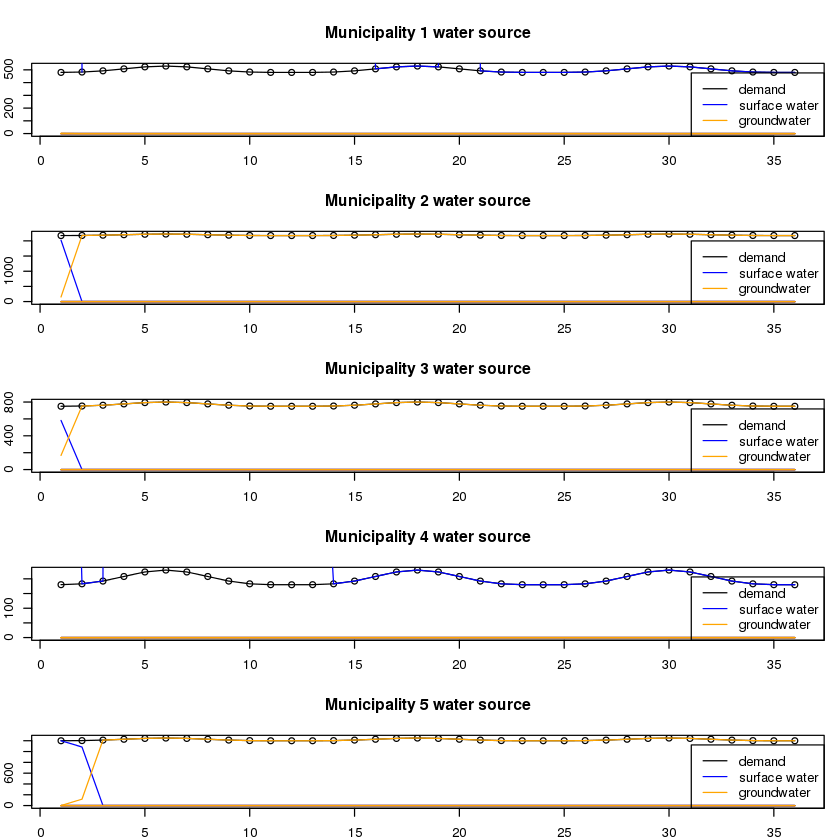

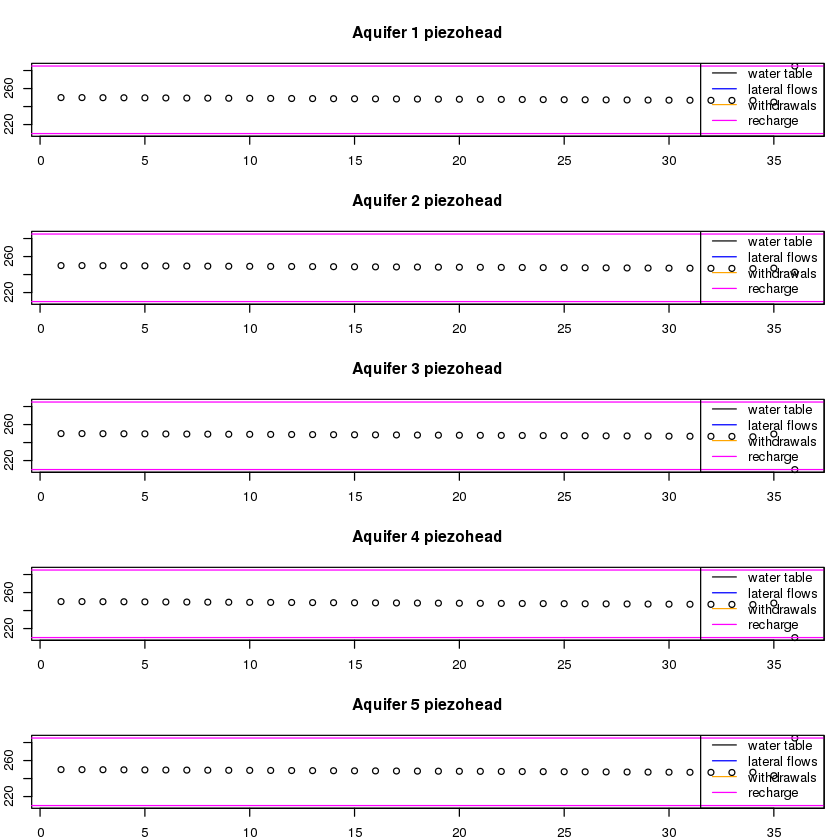

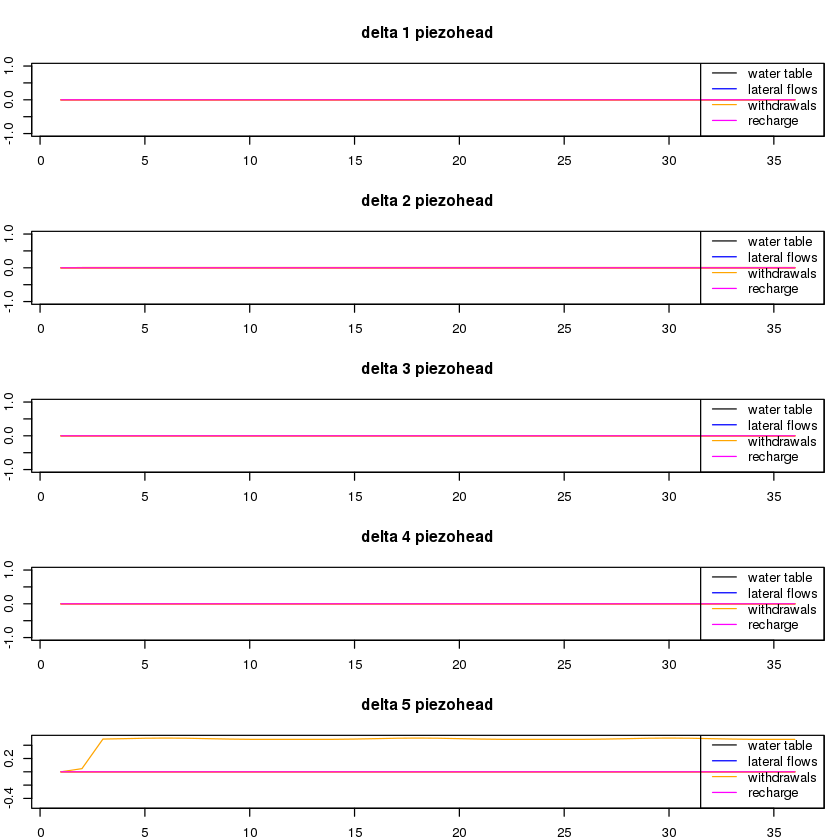

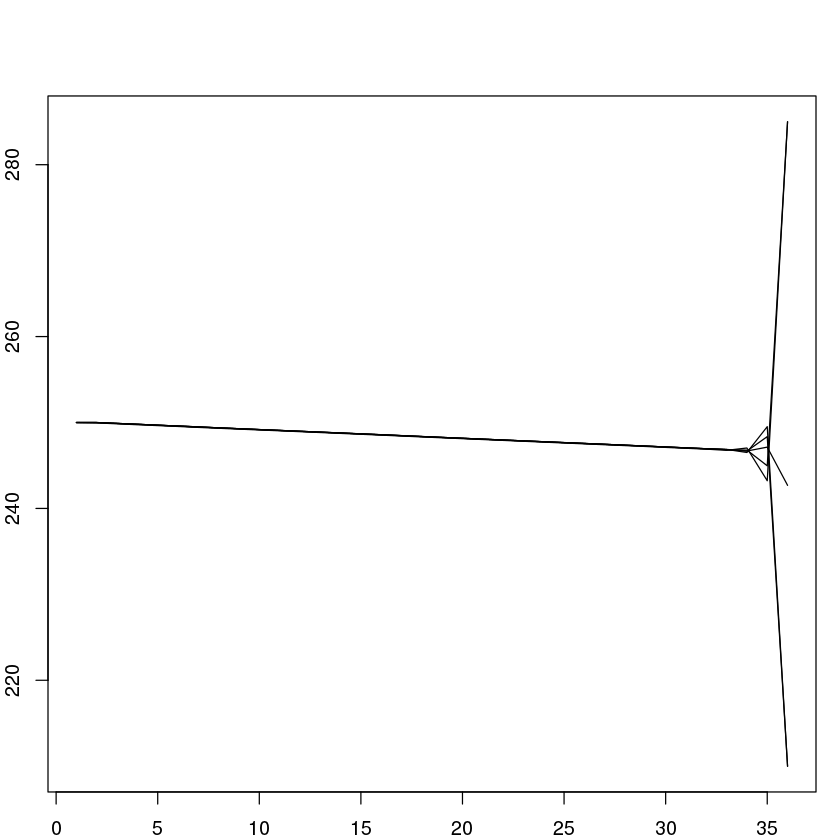

In [5]:
source("plot_results.R")